## DHIVYA BHARATHI
## GITHUB link: https://github.com/dhivyabharathi001/Spark-foundation-Tasks
## SPARK FOUNDATION INTERNSHIP
## TASK 2:
# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


# Import the Data

In [2]:
# Reading data from remote link
data = pd.read_csv(r"C:\Users\Dhivya Bharathi\Downloads\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(['Id', 'Species'], axis = 1, inplace = True)

In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Data Visualization

<AxesSubplot:ylabel='Frequency'>

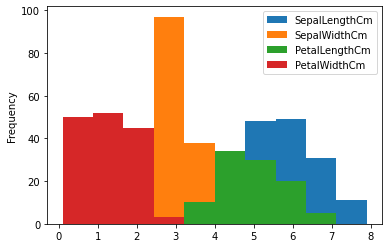

In [7]:
data.plot(kind = 'hist')

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

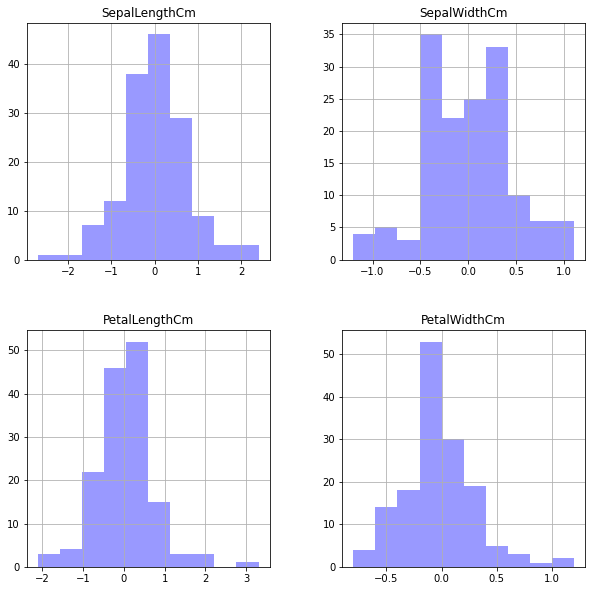

In [8]:
data.diff().hist(color = 'b', alpha = 0.4, figsize=(10,10))

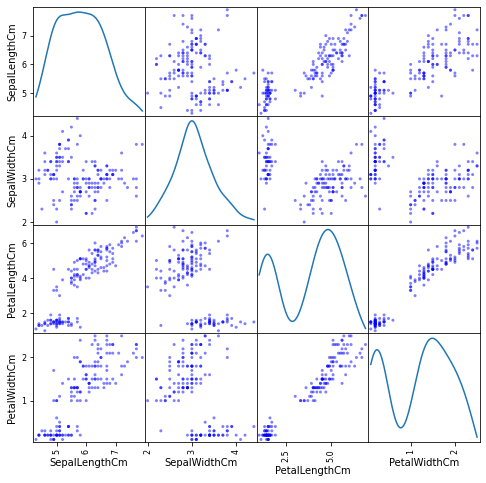

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize= (8,8), diagonal='kde', color = 'b')
plt.show()

<AxesSubplot:ylabel='0'>

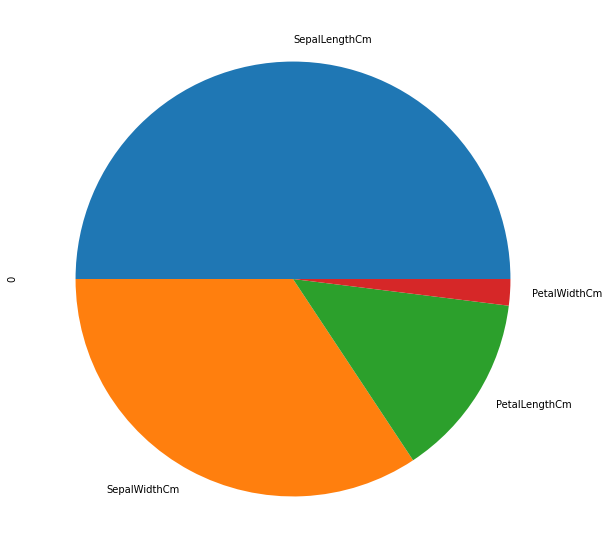

In [10]:
d = data.iloc[0]
d.plot.pie(figsize = (10,10))

# predict the optimum number of clusters

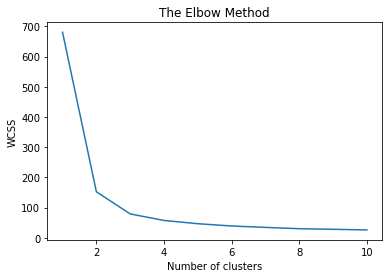

In [11]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# optimum number clusters is 3

# Kmeans clustering

In [12]:
data = pd.read_csv(r"C:\Users\Dhivya Bharathi\Downloads\Iris.csv")

In [13]:
X = data.iloc[:, [1,2,3,4]].values

In [14]:
kmeans = KMeans(n_clusters = 3, init='k-means++',  max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [15]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

# Cluster Visualization

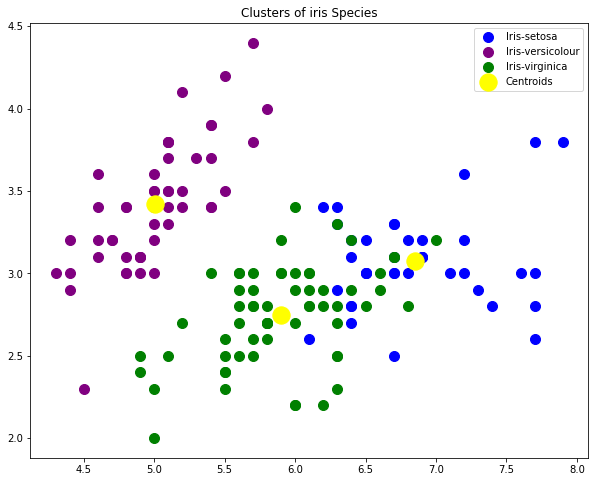

In [16]:
plt.figure(figsize = (10,8))

# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of iris Species')
plt.legend()
plt.show()